In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline

## About the dataset
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

    <li> Customers who left within the last month – the column is called Churn
    <li> Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    <li> Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    <li> Demographic info about customers – gender, age range, and if they have partners and dependents.



In [2]:
import wget
wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv')

'ChurnData.csv'

In [3]:
df = pd.read_csv('ChurnData.csv')

In [4]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [5]:
df=df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]

In [6]:
df['churn']=df['churn'].astype('int')

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [8]:
df.shape

(200, 10)

In [9]:
X=np.asarray(df[["tenure","age","address","income","ed","employ","equip"]])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [10]:
y=np.asarray(df["churn"])
y[0:5]
             

array([1, 1, 0, 0, 0])

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
X = preprocessing.StandardScaler().fit_transform(X)

In [14]:
X[:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Train - Test Data Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [17]:
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


## Modeling (Logistic Regression with Scikit-learn)

Lets build our model using LogisticRegression from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now lets fit our model with train set

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
LR=LogisticRegression(C=0.1,solver='liblinear')

In [21]:
LR.fit(X_train,Y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [22]:
yhat=LR.predict(X_test)

In [23]:
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [24]:
yhat_prob=LR.predict_proba(X_test)
yhat_prob

array([[0.64767463, 0.35232537],
       [0.82176729, 0.17823271],
       [0.72891356, 0.27108644],
       [0.85441058, 0.14558942],
       [0.73331569, 0.26668431],
       [0.65386776, 0.34613224],
       [0.66585389, 0.33414611],
       [0.80621898, 0.19378102],
       [0.32801549, 0.67198451],
       [0.8557654 , 0.1442346 ],
       [0.73154705, 0.26845295],
       [0.7907532 , 0.2092468 ],
       [0.53667203, 0.46332797],
       [0.37036435, 0.62963565],
       [0.83947561, 0.16052439],
       [0.59559711, 0.40440289],
       [0.57045125, 0.42954875],
       [0.59425185, 0.40574815],
       [0.55785766, 0.44214234],
       [0.67206081, 0.32793919],
       [0.81562381, 0.18437619],
       [0.58137606, 0.41862394],
       [0.87829351, 0.12170649],
       [0.53818345, 0.46181655],
       [0.56296549, 0.43703451],
       [0.91420316, 0.08579684],
       [0.58608915, 0.41391085],
       [0.60071461, 0.39928539],
       [0.63395468, 0.36604532],
       [0.92561551, 0.07438449],
       [0.

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


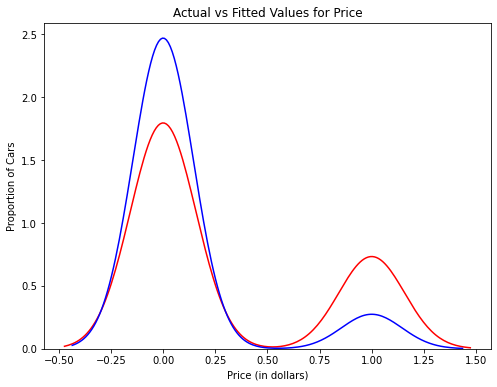

In [28]:
import seaborn as sns
plt.figure(figsize=(8,6))


ax1 = sns.distplot(df['churn'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()